In [4]:
from uco.model import OneCycleLRWithWarmup, QHAdamW
import segmentation_models_pytorch as smp
import matplotlib.pyplot as plt

In [13]:
net = smp.Unet()
optim = QHAdamW(net.parameters())

Load result: None


In [20]:
scheduler = OneCycleLRWithWarmup(
    optim, 
    num_steps=25,
    init_lr=0.0001,
    lr_range=(1e-1, 1e-2, 1e-10),
    warmup_steps=2, 
    decay_steps=5
)
optim.step()
lrs = []
for epoch in range(25):
    lrs.append(scheduler.get_lr())
    scheduler.step()
lrs

[[0.0001],
 [0.1],
 [0.1],
 [0.09470588235294118],
 [0.08941176470588236],
 [0.08411764705882353],
 [0.07882352941176471],
 [0.07352941176470588],
 [0.06823529411764706],
 [0.06294117647058824],
 [0.05764705882352941],
 [0.05235294117647059],
 [0.047058823529411764],
 [0.04176470588235294],
 [0.036470588235294116],
 [0.03117647058823529],
 [0.025882352941176467],
 [0.020588235294117643],
 [0.01529411764705882],
 [0.01],
 [0.01],
 [0.007500000025],
 [0.00500000005],
 [0.0025000000749999998],
 [1e-10]]

Text(0.5, 1.0, 'Learning Rate')

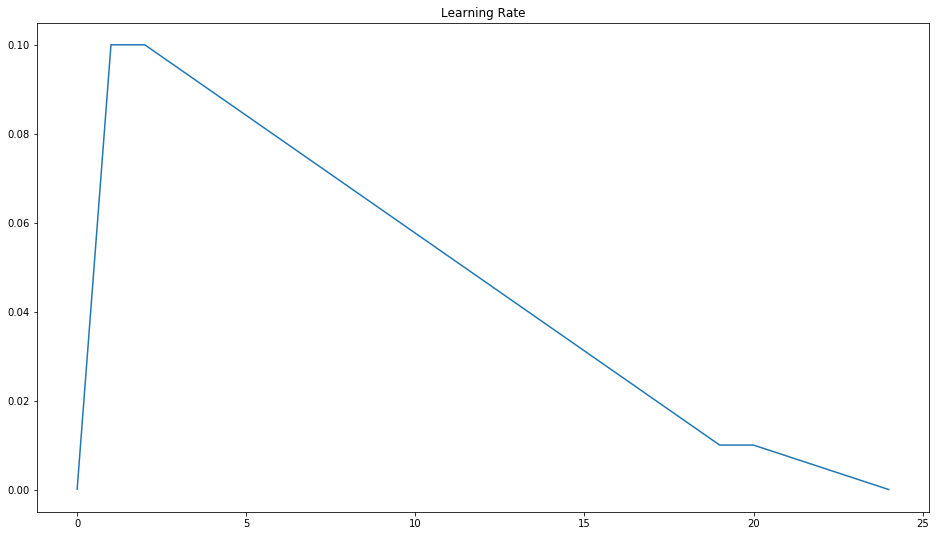

In [21]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(lrs)
ax.set_title('Learning Rate')